In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [3]:
data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')


data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [4]:
data = data[['Close']]


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

scaled_data[:5]


array([[0.00447776],
       [0.00455321],
       [0.00385789],
       [0.00377836],
       [0.00406383]])

In [6]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)


seq_length = 60

x, y = create_sequences(scaled_data, seq_length)

x = x.reshape((x.shape[0], x.shape[1], 1))


In [7]:
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


x_train.shape, x_test.shape


((2569, 60, 1), (643, 60, 1))

In [8]:
model = Sequential()


model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Training the model
model.fit(x_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0053
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 3.2447e-04
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 2.8256e-04
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 3.3470e-04
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 2.2261e-04
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 2.3810e-04
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 2.0063e-04
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 1.9894e-04
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.9489e-04
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1.9412e-04
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 1.5747e-04
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1.6413e-04
Epoch 13/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 1.6019e-04
Epoch 14/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.6223e-04
Epoch 15/50
81/81 

In [10]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step
MAE: 4.3743727759662345
RMSE: 5.389801344818074


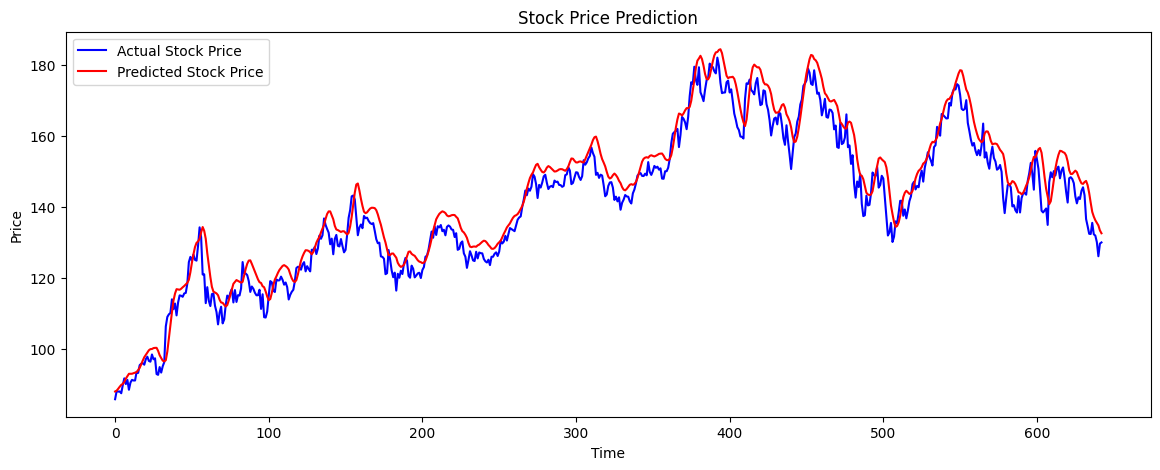

In [11]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [15]:
!git config --global user.name "Harsh Parihar"
!git config --global user.email "harshparihar7746@gmail.com"
